# Logistic Regression Model

## Train for 20 epochs

Observe the loss decreasing while training.

In [4]:
%%capture
!python LogisticRegression.py --max_epochs=20

## Inspect logs
⚠️ Make sure to **Stop** the cell execution after observing the logs

This simple logistic regression achieves **90% accuracy** on the MNIST test data set.

In [5]:
!tensorboard --logdir=./lightning_logs

W0909 14:38:13.390138 123145347186688 plugin_event_accumulator.py:321] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0909 14:38:13.393561 123145347186688 plugin_event_accumulator.py:359] Found more than one "run metadata" event with tag step1. Overwriting it with the newest event.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


## Load trained model
Checkpoints are saved incrementally for each training session under `./lightning_logs/version_X`.

In [7]:
__import__("sys").path.append("..")
import utils

from LogisticRegression import LogisticRegression


model = utils.load_trained_model_for_evaluation(LogisticRegression, 0)
print(model)

LogisticRegression(
  (seq): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)


## Predict MNIST labels

In [8]:
from pytorch_lightning import Trainer

trainer = Trainer(accelerator='gpu')
trainer.test(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.9133999943733215
        test_loss           0.3127702474594116
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

[{'test_loss': 0.3127702474594116, 'test_acc': 0.9133999943733215}]

Original label:  8 Predicted label:  8


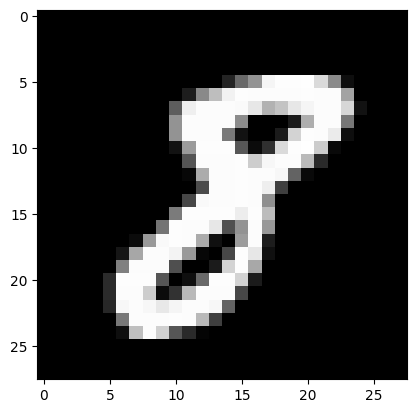

Original label:  6 Predicted label:  6


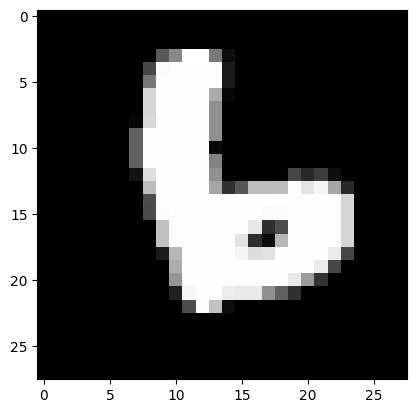

Original label:  7 Predicted label:  7


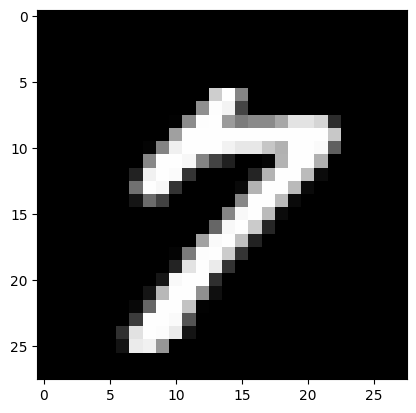

Original label:  2 Predicted label:  2


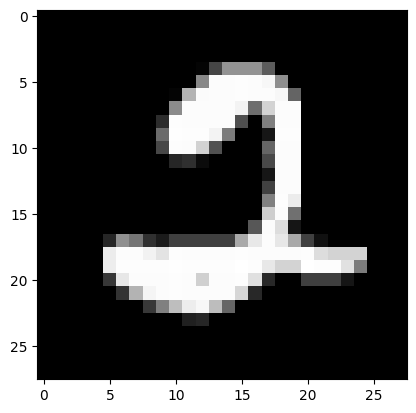

Original label:  0 Predicted label:  0


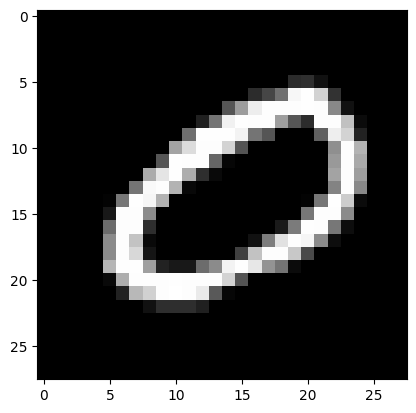

Original label:  1 Predicted label:  1


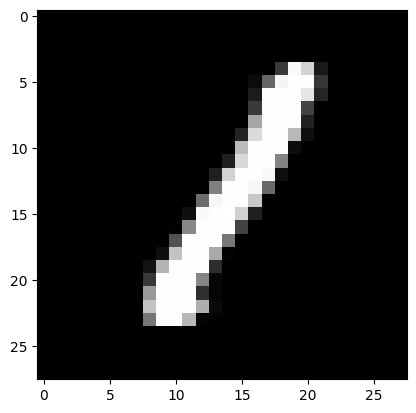

Original label:  6 Predicted label:  6


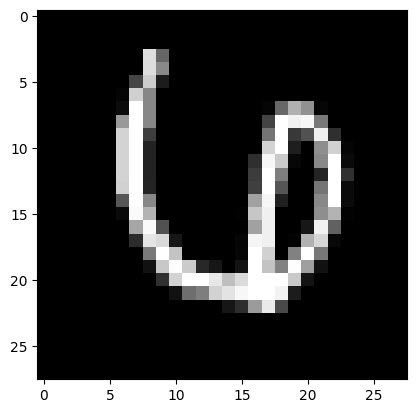

Original label:  8 Predicted label:  3


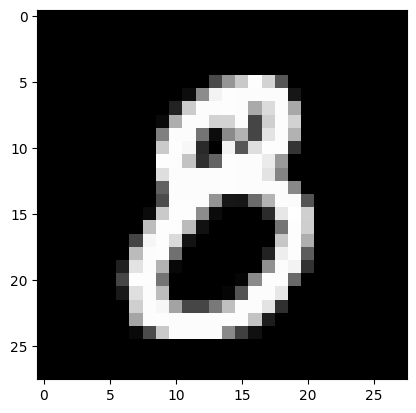

Original label:  1 Predicted label:  1


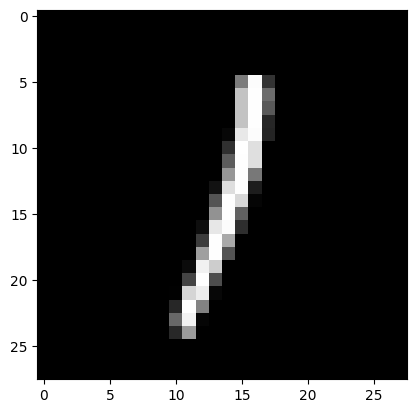

Original label:  7 Predicted label:  7


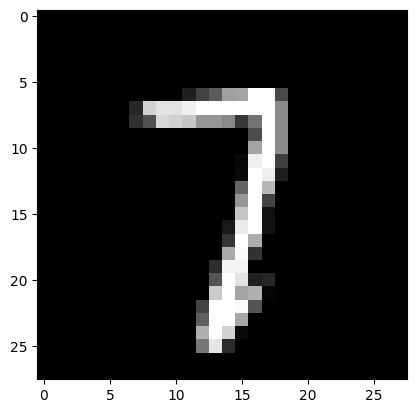

In [5]:
import torch
import random

model.setup('test')
test_len = model.mnist_test.data.shape[0]

for i in range(0, 10):
    orig_img, orig_label = model.mnist_test[random.randint(0, test_len)]
    orig_img = orig_img.view(1, 1, 28, 28)
    classes = model(orig_img)
    predicted_label = torch.max(classes.data, 1).indices.item()

    print("Original label: ", orig_label, "Predicted label: ", predicted_label)
    utils.plot_images([orig_img.view(28, 28)])